In [1]:
import numpy as np
print('Numpy version:', np.__version__)

import matplotlib as mpl
print('Matplotlib version:', mpl.__version__)
import matplotlib.pyplot as plt


Numpy version: 1.23.5
Matplotlib version: 3.6.2


In [7]:
with open('stopwords.txt', 'r') as f:
    sw = f.readlines()
sw = [x.replace('\n', '') for x in sw]
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

In [9]:
with open('stopwords.txt', 'r') as f:
    sw = f.read().split('\n')[:-1]
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

In [4]:
feature_matrix = (np.round(np.random.random(20) * 10)).reshape(5, -1)
feature_matrix

array([[ 6.,  5.,  6.,  5.],
       [ 8.,  0.,  1.,  2.],
       [ 7., 10.,  1.,  3.],
       [ 4.,  1.,  9.,  0.],
       [ 9.,  5.,  4., 10.]])

In [11]:
theta = np.round(np.random.random(4)*3)
theta_0 = 3.0
print(theta, '\n', theta_0)

[2. 1. 2. 2.] 
 3.0


In [13]:
feature_matrix_mod = np.hstack((feature_matrix, np.ones(shape=(feature_matrix.shape[0], 1))))
feature_matrix_mod

array([[ 6.,  5.,  6.,  5.,  1.],
       [ 8.,  0.,  1.,  2.,  1.],
       [ 7., 10.,  1.,  3.,  1.],
       [ 4.,  1.,  9.,  0.,  1.],
       [ 9.,  5.,  4., 10.,  1.]])

In [14]:
theta_mod = np.hstack((theta, theta_0))
theta_mod

array([2., 1., 2., 2., 3.])

In [15]:
feature_matrix_mod.dot(theta_mod.T)

array([42., 25., 35., 30., 54.])

In [17]:
np.apply_along_axis(lambda x: x.sum(), 1, feature_matrix)

array([22., 11., 21., 14., 28.])

In [20]:
labels = np.sign(np.random.randint(-1, 1, 5))
labels

array([ 0, -1,  0, -1,  0])

In [21]:
labels = np.where(labels == 0, 1, labels)
labels

array([ 1, -1,  1, -1,  1])

In [25]:
evals = 1 - labels*feature_matrix_mod.dot(theta_mod.T)
print(evals)
evals = np.where(evals < 0, 0, evals)
print(evals)

[-41.  26. -34.  31. -53.]
[ 0. 26.  0. 31.  0.]


In [63]:
def hinge_loss(coord, label, theta, theta_0):
    return np.max((0, 1 - label * ((coord * theta).sum() + theta_0)))

Length of theta: 3.61
[2.25, 5.0, 1.25, 1.35, 6.0, 10.0, 0.0, 0.0]


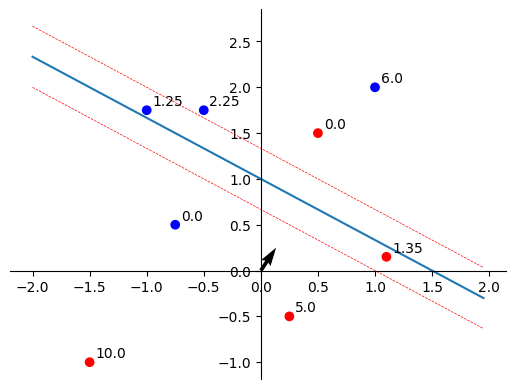

In [69]:
theta = np.array([2.0, 3.0])
theta_0 = -3.0

theta_star1 = 2.0 * theta
theta_star2 = 0.5 * theta

norm = lambda x: np.sqrt((x**2).sum())

X_1 = np.arange(-2, 2, 0.05)
X_2 = (-theta[0] * X_1 - theta_0) / theta[1]


print('Length of theta: {:.2f}'.format(norm(theta)))
#print('Length of theta_star1: {:.2f}'.format(norm(theta_star1)))
#print('Length of theta_star2: {:.2f}'.format(norm(theta_star2)))

bound_lower = (-theta[0] * X_1 - theta_0 - 1) / theta[1]
bound_upper = (-theta[0] * X_1 - theta_0 + 1) / theta[1]

bound_lower_star1 = (-theta_star1[0] * X_1 - theta_0 - 1) / theta_star1[1]
bound_upper_star2 = (-theta_star2[0] * X_1 - theta_0 + 1) / theta_star2[1]

test_points = np.array([[-0.5, 1.75], [0.25, -0.5], [-1, 1.75], [1.1, 0.15], [1, 2], [-1.5, -1], [-0.75, 0.5], [0.5, 1.5]])
test_y = np.array([-1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0])
test_hinge = [np.round(hinge_loss(test_points[i, :], test_y[i], theta, theta_0), 2) for i in range(test_points.shape[0])]
print(test_hinge)

plt.plot(X_1, X_2)
plt.plot(X_1, bound_lower, 'r--', lw=0.5)
plt.plot(X_1, bound_upper, 'r--', lw=0.5)
plt.scatter(test_points[:, 0], test_points[:, 1], c=test_y, cmap='bwr')
plt.quiver(theta[0], theta[1])
#plt.plot(X_1, bound_lower_star1, 'g--', lw=0.75)
#plt.plot(X_1, bound_upper_star2, 'c--', lw=0.75)
ax = plt.gca()
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for i in range(len(test_hinge)):
    ax.annotate(test_hinge[i], xy=test_points[i, :]+0.05)